In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/masksforwordclouds/twitter_mask2.png
/kaggle/input/masksforwordclouds/twitter_mask4.jpg
/kaggle/input/masksforwordclouds/twitter_mask3.jpg
/kaggle/input/masksforwordclouds/book-logo-1.jpg
/kaggle/input/masksforwordclouds/twitter_mask.png
/kaggle/input/masksforwordclouds/wordcloud-man.png
/kaggle/input/masksforwordclouds/twitter_mask3.png
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>EDA on fake-and-real news</strong></p>

<p style = "font-size : 35px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Importing Libraries</strong></p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Read The Datasets</strong></p>

In [3]:
fake=pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")
true=pd.read_csv("../input/fake-and-real-news-dataset/True.csv")

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


<p style="font-size:150%; font-family:cursive;">Now we introduce a new column named as target. Here target 1 shows the real news and target 0 shows the fake news.And then we just concatenate both the dataframes to give a single dataframe and then we can further proceed for exploratory data analysis </p>

In [6]:
true['target']=1
fake['target']=0

In [7]:
df=pd.concat([true,fake])

In [8]:
df.shape

(44898, 5)

In [9]:
df.head(2)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>target feature view</strong></p>

In [10]:
temp = df.groupby('target').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,target,text
0,0,23481
1,1,21417


<AxesSubplot:xlabel='target', ylabel='count'>

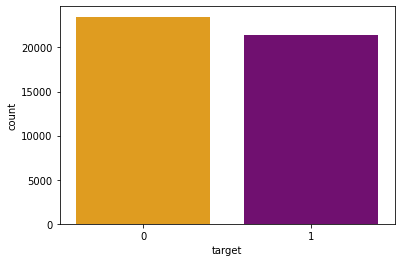

In [11]:
sns.countplot(x='target',data=df,palette=['orange','purple'])

In [12]:
from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text =temp.target,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Target Distribution"}
    ))
fig.show()

<p style="font-size:150%; font-family:cursive;">In the final dataset the count of fake news is greater than real news </p>

In [13]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

<p style="font-size:150%; font-family:cursive;">No null values are present in the dataset </p>

In [14]:
df.nunique()

title      38729
text       38646
subject        8
date        2397
target         2
dtype: int64

In [15]:
df.dtypes

title      object
text       object
subject    object
date       object
target      int64
dtype: object

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>subject vs target</strong></p>

<AxesSubplot:xlabel='subject', ylabel='count'>

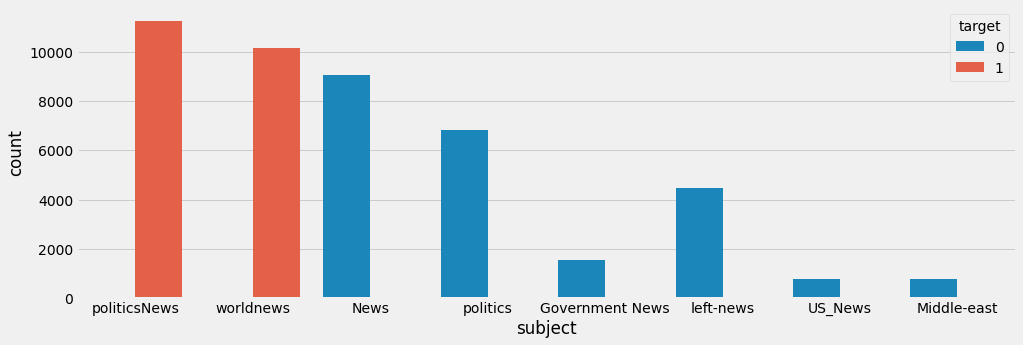

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
sns.countplot(x='subject',data=df,hue='target')

<p style="font-size:150%; font-family:cursive;">This shows that all the real news have the subject politicsNews and worldnews. Apart from these subjects other six subjects lies in the fake news category </p>

In [17]:
df['text']=df['text']+" "+df['title']

In [18]:
df.drop(['title','subject','date'],axis=1,inplace=True)
df.head()

,text,target
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>No of words in real & fake news</strong></p>

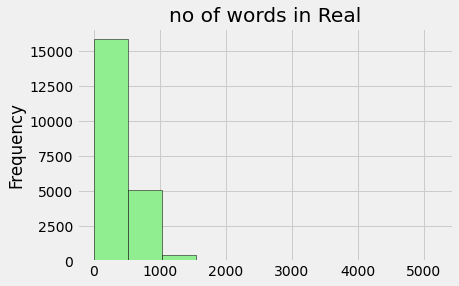

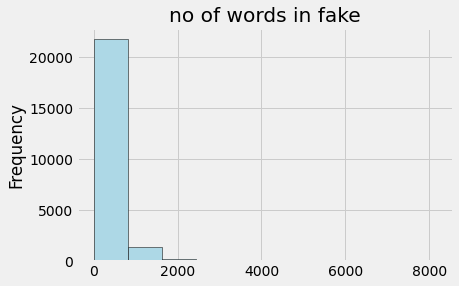

In [19]:
no_words=df[df['target']==1].text.str.split().map(lambda x:len(x))
no_words.plot(kind='hist',edgecolor='black',color='lightgreen',title='no of words in Real')
plt.show()
no_words=df[df['target']==0].text.str.split().map(lambda x:len(x))
no_words.plot(kind='hist',edgecolor='black',color='lightblue',title='no of words in fake')
plt.show()

<p style="font-size:150%; font-family:cursive;">No of words in real news are lying in the range of 0 to 1500
whereas in the case of fake news it lies in the range of 0 to 2000.This shows that number of words in the fake news are higher than that of real news</p>

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Average length of words in real & fake news</strong></p>

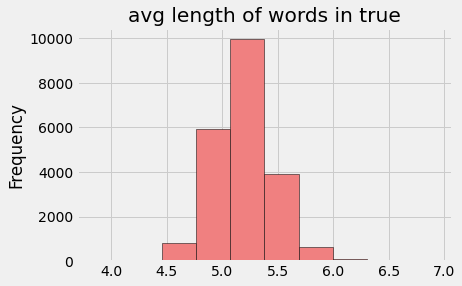

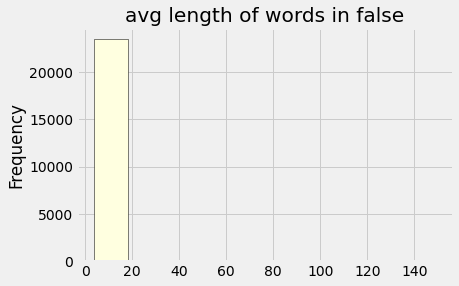

In [20]:
avg_len_word=df[df['target']==1].text.str.split().map(lambda x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',edgecolor='black',color='lightcoral',title='avg length of words in true')
plt.show()
avg_len_word=df[df['target']==0].text.str.split().map(lambda x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',edgecolor='black',color='lightyellow',title='avg length of words in false')
plt.show()

<p style="font-size:150%; font-family:cursive;">The average length of word in real news ranging from 4.5 to 6.0
whereas in the case of fake news it lies in the range of 0 to 20.This shows that in the fake news most of the words have length greater than the words of real news.</p>

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Analyzing the top stop words in the real and fake news</strong></p>

# First way

In [21]:
# creating sample words
def create_words(target):
    words = []
    for x in df[df['target']==target]['text'].str.split():
        for i in x:
            words.append(i)
    return words

In [22]:
from collections import defaultdict
def analyze_stopwords(data,fun,target):
    values_list=[]
    dic=defaultdict(int)
    for i in range(0,len(target)):
        corpus=fun(target[i])
        for word in corpus:
            dic[word]+=1
        top=sorted(dic.items(),key=lambda x:x[1],reverse=True)[:10]
        x_items,y_items=zip(*top)
        values_list.append(x_items)
        values_list.append(y_items)
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.bar(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Real")
    
    ax2.bar(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Fake")
            
    plt.suptitle("Top Stop words in text")
    plt.show()

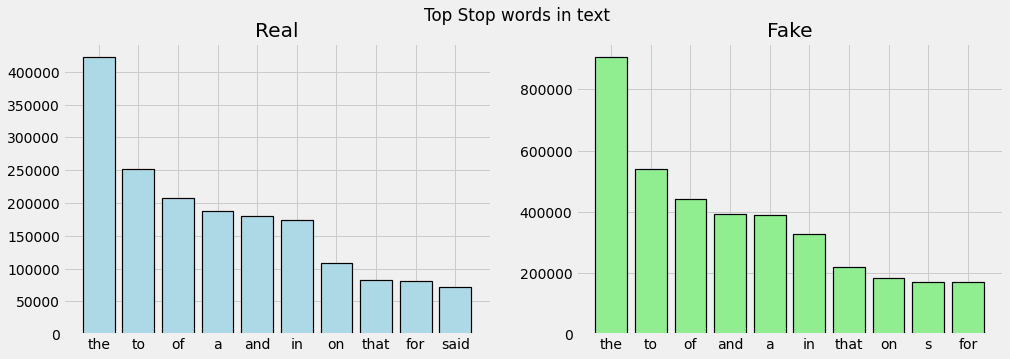

In [23]:
analyze_stopwords(df,create_words,[1,0])

# Second way

In [24]:
from collections import Counter
df['temp_list']=df['text'].apply(lambda x: str(x).split())
top=Counter([word for li in df['temp_list'] for word in li])
temp_1=pd.DataFrame(top.most_common(20))
temp_1.columns=["most_common_words","frequency"]
temp_1.style.background_gradient(cmap='Blues')

,most_common_words,frequency
0,the,907070
1,to,538754
2,of,441512
3,and,393995
4,a,391144
5,in,327394
6,that,221170
7,on,185433
8,s,172260
9,for,169435


In [25]:
import plotly.express as pe
import plotly.figure_factory as ff
fig = pe.bar(temp_1, x="frequency", y="most_common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='most_common_words')
fig.show()

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Analyzing the top punctuation marks in  real & fake news</strong></p>

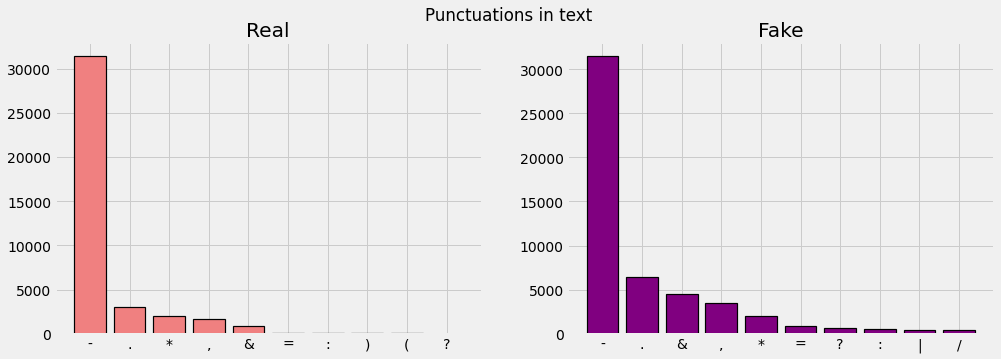

In [26]:
import string
punctuation_list=list(string.punctuation)
value_list=[]
def most_occuring(dataset,fun,target):
    d=defaultdict(int)
    for j in range(0,len(target)):
        words=fun(target[j])
        for i in words:
            if i in punctuation_list:
                d[i]+=1
        top=sorted(d.items(),key=lambda x: x[1],reverse=True)[:10]
        x_items,y_counts=zip(*top)
        value_list.append(x_items)
        value_list.append(y_counts)
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.bar(value_list[0],value_list[1],color="lightcoral",edgecolor='black', linewidth=1.2)
    ax1.set_title("Real")
    
    ax2.bar(value_list[2],value_list[3],color="purple",edgecolor='black', linewidth=1.2)
    ax2.set_title("Fake")
            
    plt.suptitle("Punctuations in text")
    plt.show()

most_occuring(df,create_words,[1,0])

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Text preprocessing</strong></p>

In [27]:
import re
import string
from nltk.corpus import stopwords

def clean_text(text):
    """Process text function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """
    lemmatizer = WordNetLemmatizer()
    stopwords_english = stopwords.words('english')
    text= re.sub('\[[^]]*\]', '', text)
    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    #removal of html tags
    review =re.sub(r'<.*?>',' ',text) 
    # remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    text = re.sub('[^a-zA-Z]',' ',text) 
    text = text.lower()
    text_tokens =word_tokenize(text)

    text_clean = []
    for word in  text_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            lem_word =lemmatizer.lemmatize(word)  # lemmitiging word
            text_clean.append(lem_word)
    text_mod=[i for i in text_clean if len(i)>2]
    text_clean=' '.join(text_mod)
    return  text_clean

In [28]:
df['clean_text']=df['text'].apply(lambda x: clean_text(x))

In [29]:
df['clean_text'][:2]

0    washington reuters head conservative republica...
1    washington reuters transgender people allowed ...
Name: clean_text, dtype: object

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Look at the top words of the dataset</strong></p>

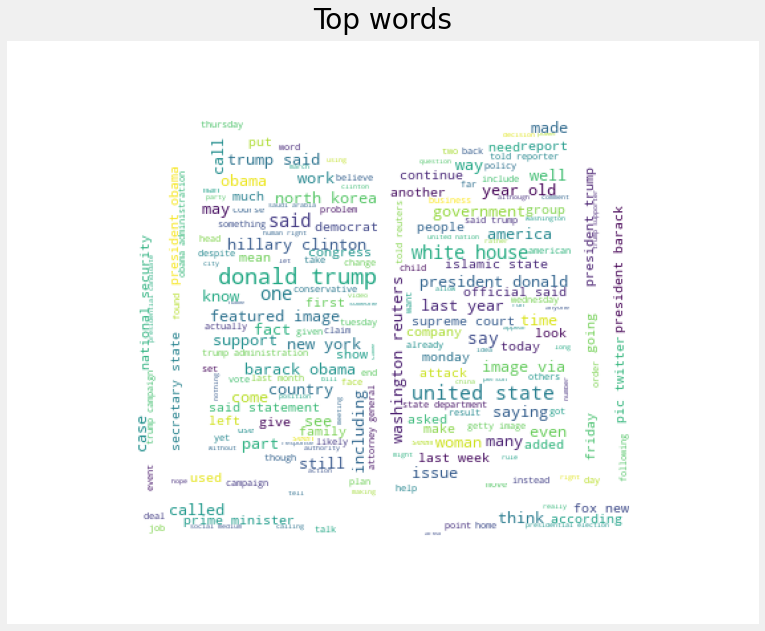

In [30]:
# wordcloud
from PIL import Image
book_mask = np.array(Image.open('../input/masksforwordclouds/book-logo-1.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=book_mask,
)
wc.generate(' '.join(text for text in df.loc[:, 'clean_text']))
plt.figure(figsize=(18,10))
plt.title('Top words', 
          fontdict={'size': 28,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [31]:
df['clean_temp']=df['clean_text'].apply(lambda x: str(x).split())
top=Counter([word for li in df['clean_temp'] for word in li])
temp_2=pd.DataFrame(top.most_common(20))
temp_2.columns=["common_words",'frequency']
temp_2.style.background_gradient(cmap='Blues')

,common_words,frequency
0,trump,142609
1,said,131174
2,state,61511
3,president,56889
4,would,54309
5,year,41475
6,people,40894
7,republican,40778
8,one,38265
9,new,32225


In [32]:
top.most_common(20)

[('trump', 142609),
 ('said', 131174),
 ('state', 61511),
 ('president', 56889),
 ('would', 54309),
 ('year', 41475),
 ('people', 40894),
 ('republican', 40778),
 ('one', 38265),
 ('new', 32225),
 ('also', 30336),
 ('obama', 30225),
 ('government', 29878),
 ('clinton', 29872),
 ('reuters', 29546),
 ('house', 29505),
 ('say', 28649),
 ('time', 28163),
 ('donald', 28038),
 ('election', 25506)]

In [33]:
fig = pe.treemap(temp_2, path=['common_words'], values='frequency',title='Tree of Most Common Words')
fig.show()

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Top 50 words in real & fake news</strong></p>

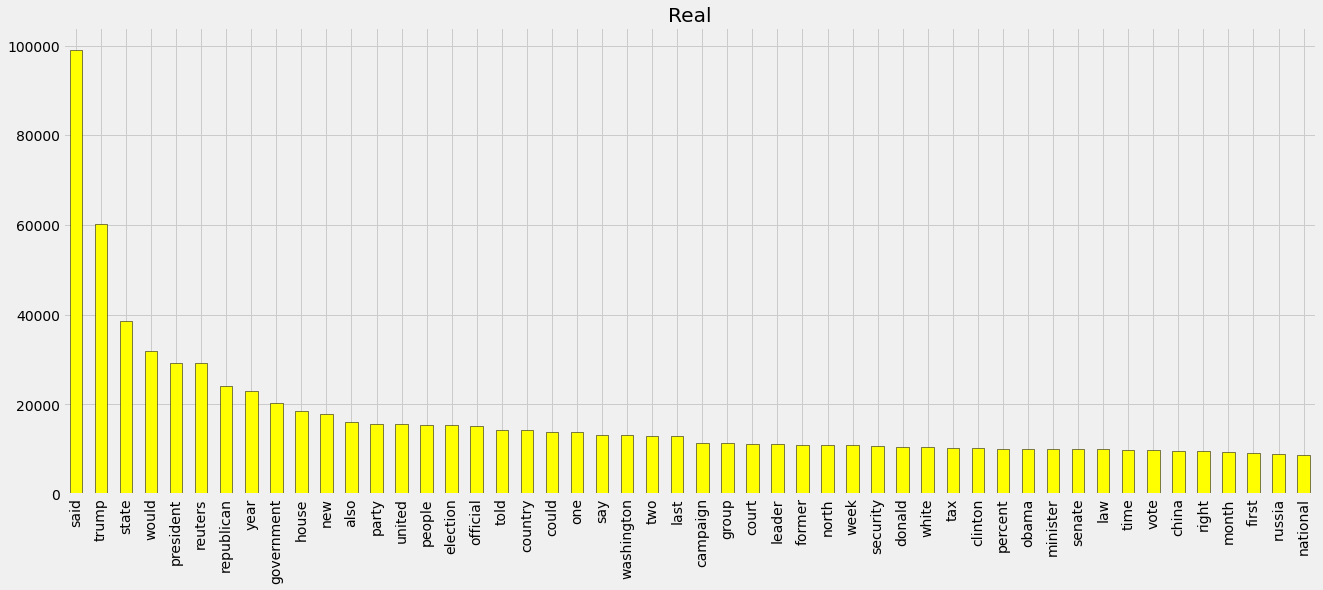

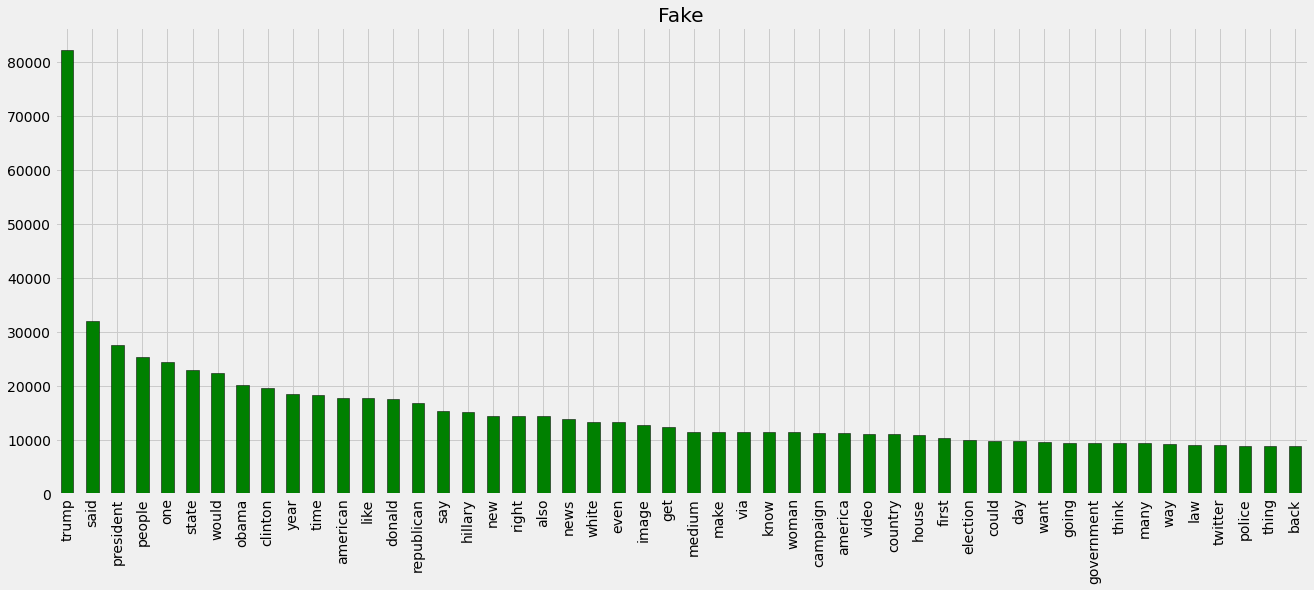

In [34]:
# analyze top 50 words in Real and false texts
data_1=df[df['target']==1]
pd.Series(' '.join([i for i in data_1.clean_text]).split()).value_counts()[:50].plot(kind='bar',figsize=(20,8),color='yellow'
                                                                                       ,edgecolor='black',title='Real')
plt.show()

data_0=df[df['target']==0]
pd.Series(' '.join([i for i in data_0.clean_text]).split()).value_counts()[:50].plot(kind='bar',figsize=(20,8),color='green'
                                                                                       ,edgecolor='black',title='Fake')
plt.show()

<p style = "font-size : 35px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightblue; border-radius: 5px 5px;"><strong>N-Grams</strong></p>

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Generating N-Grams</strong></p>

In [35]:
data=' '.join([sentance for sentance in df['clean_text']])

In [36]:
import nltk
from nltk.util import ngrams
 
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
 
unigrams=extract_ngrams(data, 1)
bigrams= extract_ngrams(data, 2)
trigrams= extract_ngrams(data, 3)
fourgrams=extract_ngrams(data, 4)

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>counting the frequency of n- grams</strong></p>

In [37]:
freq_uni = nltk.FreqDist(unigrams)
freq_bi = nltk.FreqDist(bigrams)
freq_tri = nltk.FreqDist(trigrams)
freq_four = nltk.FreqDist(fourgrams)

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightcoral; border-radius: 5px 5px;"><strong>Top 20 Unigrams</strong></p>

<BarContainer object of 20 artists>

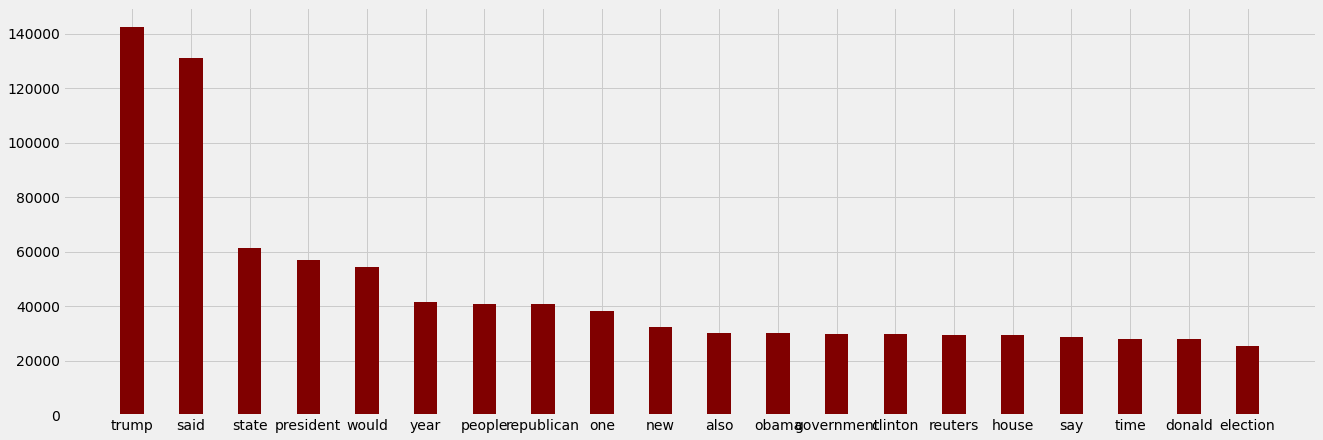

In [38]:
# top 20 uigrams
top_20_uni=freq_uni.most_common(20)
top_20_uni_words,top_20_uni_freq=list(zip(*top_20_uni))
plt.figure(figsize=(20,7))
plt.bar(top_20_uni_words, top_20_uni_freq, color ='maroon',
        width = 0.4)

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightcoral; border-radius: 5px 5px;"><strong>Top 20 Bigrams</strong></p>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

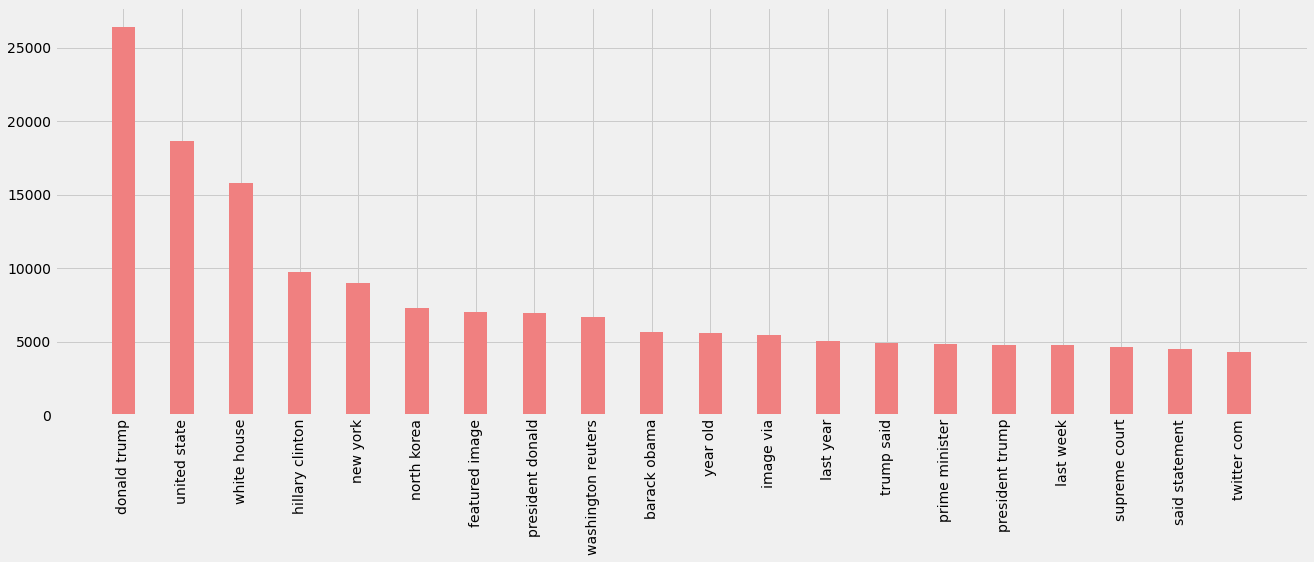

In [39]:
top_20_bi=freq_bi.most_common(20)
top_20_bi_words,top_20_bi_freq=list(zip(*top_20_bi))
plt.figure(figsize=(20,7))
plt.bar(top_20_bi_words, top_20_bi_freq, color ='lightcoral',
        width = 0.4)
plt.xticks(rotation=90) 

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightcoral; border-radius: 5px 5px;"><strong>Top 20 Trigrams</strong></p>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

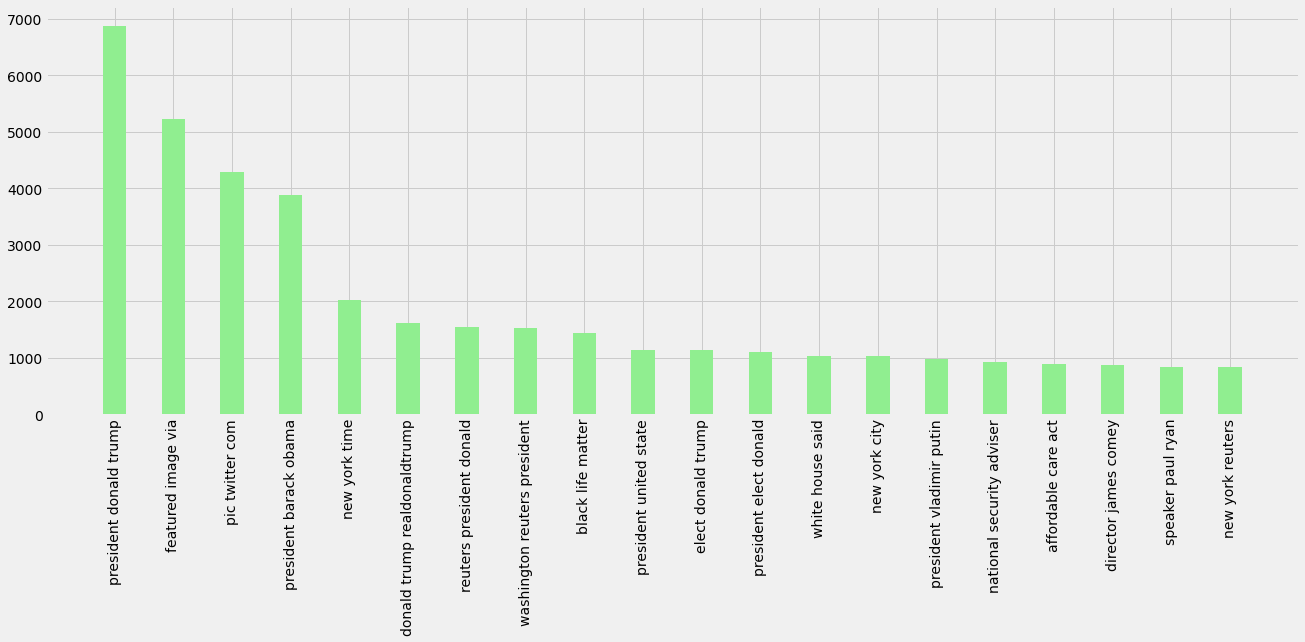

In [40]:
top_20_tri=freq_tri.most_common(20)
top_20_tri_words,top_20_tri_freq=list(zip(*top_20_tri))
plt.figure(figsize=(20,7))
plt.bar(top_20_tri_words, top_20_tri_freq, color ='lightgreen',
        width = 0.4)
plt.xticks(rotation=90) 

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightcoral; border-radius: 5px 5px;"><strong>Top 20 Fourgrams</strong></p>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

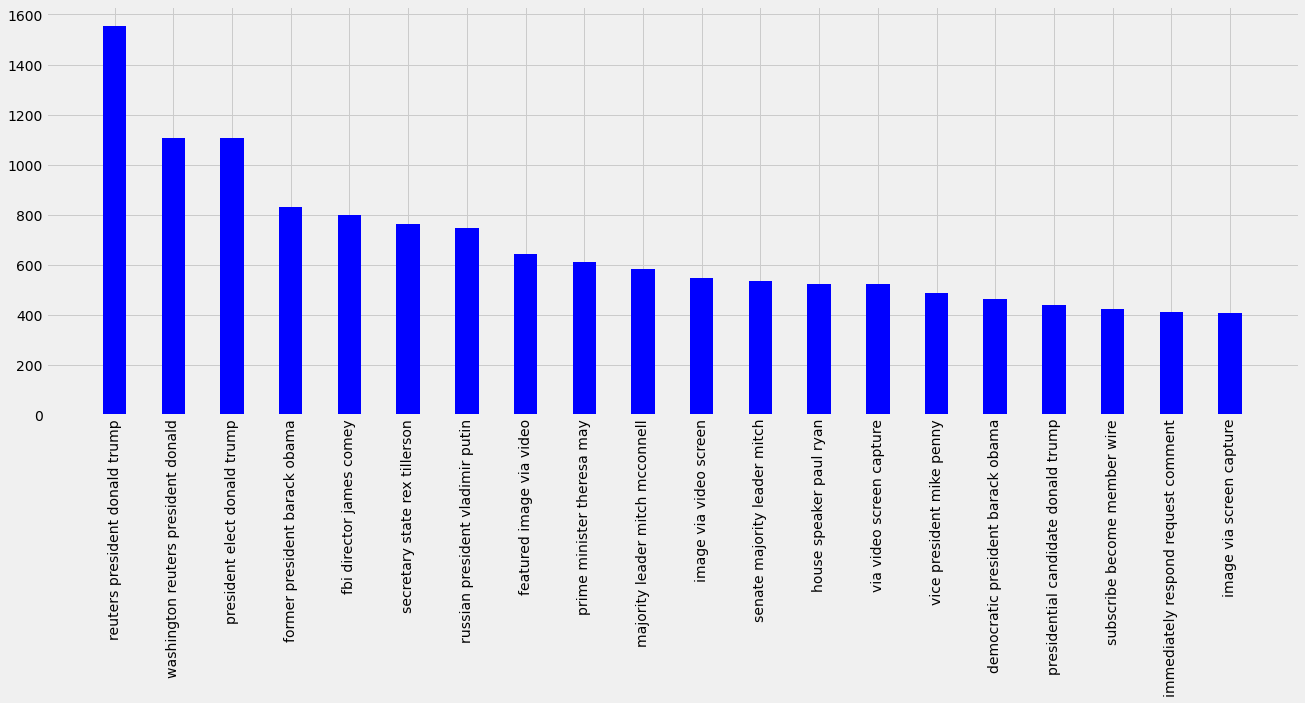

In [41]:
top_20_four=freq_four.most_common(20)
top_20_four_words,top_20_four_freq=list(zip(*top_20_four))
plt.figure(figsize=(20,7))
plt.bar(top_20_four_words, top_20_four_freq, color ='blue',
        width = 0.4)
plt.xticks(rotation=90) 

<p style="font-size:150%; font-family:cursive;">More of analysis and model part will be updated soon ! </p>